In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

In [2]:
from torchvision.transforms import v2

In [3]:
transforms = transforms.Compose([
                                 transforms.ToTensor()
])

In [4]:
train = datasets.MNIST("", train=True, transform=transforms, download=True)
train, valid = random_split(train, [50000, 10000])

In [5]:
trainloader = DataLoader(dataset=train, batch_size=128)
validloader = DataLoader(dataset=valid, batch_size=128)

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the images
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.leaky_relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

model = Network()

if torch.cuda.is_available():
    model = model.cuda()

model

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)

# LR step

In [8]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,
                                              step_size=3, gamma=0.1)


In [9]:
from tqdm import tqdm
epochs = 10

lr_rate_list = []
for e in range(epochs):
    train_loss = 0.0
    for data, labels in tqdm(trainloader):
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
    
    scheduler.step()
    lr_rate = scheduler.get_last_lr()
    lr_rate_list.append(lr_rate)
    print(f"learning rate: {lr_rate}")
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(trainloader)}')

    valid_loss = 0.0
    total_correct = 0
    total_samples = 0
    model.eval()
    for data, labels in tqdm(validloader):
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        target = model(data)

        loss = criterion(target, labels)
        valid_loss += loss.item()

        _, predicted = torch.max(target, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    accuracy = 100 * total_correct / total_samples

    print(f'Epoch {e+1} \t\t Valid Loss: {valid_loss / len(validloader)}')
    print(f'Epoch {e+1} \t\t Valid accuracy: {accuracy:.2f}%')


100%|██████████| 391/391 [00:08<00:00, 44.45it/s]


learning rate: [0.1]
Epoch 1 		 Training Loss: 0.6543633270141719


100%|██████████| 79/79 [00:01<00:00, 72.19it/s]


Epoch 1 		 Valid Loss: 0.21831095494813274
Epoch 1 		 Valid accuracy: 94.04%


100%|██████████| 391/391 [00:08<00:00, 48.34it/s]


learning rate: [0.1]
Epoch 2 		 Training Loss: 0.1758645446423222


100%|██████████| 79/79 [00:01<00:00, 64.45it/s]


Epoch 2 		 Valid Loss: 0.1716680292016532
Epoch 2 		 Valid accuracy: 94.54%


100%|██████████| 391/391 [00:08<00:00, 47.34it/s]


learning rate: [0.010000000000000002]
Epoch 3 		 Training Loss: 0.14836486694319626


100%|██████████| 79/79 [00:01<00:00, 72.04it/s]


Epoch 3 		 Valid Loss: 0.15516636534770833
Epoch 3 		 Valid accuracy: 95.37%


100%|██████████| 391/391 [00:08<00:00, 47.12it/s]


learning rate: [0.010000000000000002]
Epoch 4 		 Training Loss: 0.05918764930856807


100%|██████████| 79/79 [00:01<00:00, 69.83it/s]


Epoch 4 		 Valid Loss: 0.078158841088202
Epoch 4 		 Valid accuracy: 97.67%


100%|██████████| 391/391 [00:08<00:00, 46.84it/s]


learning rate: [0.010000000000000002]
Epoch 5 		 Training Loss: 0.04146624116174629


100%|██████████| 79/79 [00:01<00:00, 74.82it/s]


Epoch 5 		 Valid Loss: 0.07422400675448766
Epoch 5 		 Valid accuracy: 97.77%


100%|██████████| 391/391 [00:08<00:00, 47.25it/s]


learning rate: [0.0010000000000000002]
Epoch 6 		 Training Loss: 0.03195745544805837


100%|██████████| 79/79 [00:01<00:00, 73.23it/s]


Epoch 6 		 Valid Loss: 0.07344005452734241
Epoch 6 		 Valid accuracy: 97.85%


100%|██████████| 391/391 [00:08<00:00, 46.96it/s]


learning rate: [0.0010000000000000002]
Epoch 7 		 Training Loss: 0.021216724370129864


100%|██████████| 79/79 [00:01<00:00, 72.64it/s]


Epoch 7 		 Valid Loss: 0.07005060384421362
Epoch 7 		 Valid accuracy: 97.96%


100%|██████████| 391/391 [00:08<00:00, 45.80it/s]


learning rate: [0.0010000000000000002]
Epoch 8 		 Training Loss: 0.01884726653008929


100%|██████████| 79/79 [00:01<00:00, 75.12it/s]


Epoch 8 		 Valid Loss: 0.07025879494038328
Epoch 8 		 Valid accuracy: 97.99%


100%|██████████| 391/391 [00:07<00:00, 49.36it/s]


learning rate: [0.00010000000000000003]
Epoch 9 		 Training Loss: 0.017461706276225578


100%|██████████| 79/79 [00:01<00:00, 70.73it/s]


Epoch 9 		 Valid Loss: 0.07077031034078815
Epoch 9 		 Valid accuracy: 97.97%


100%|██████████| 391/391 [00:08<00:00, 48.83it/s]


learning rate: [0.00010000000000000003]
Epoch 10 		 Training Loss: 0.015785788368109777


100%|██████████| 79/79 [00:01<00:00, 67.25it/s]

Epoch 10 		 Valid Loss: 0.07059074135399954
Epoch 10 		 Valid accuracy: 97.95%


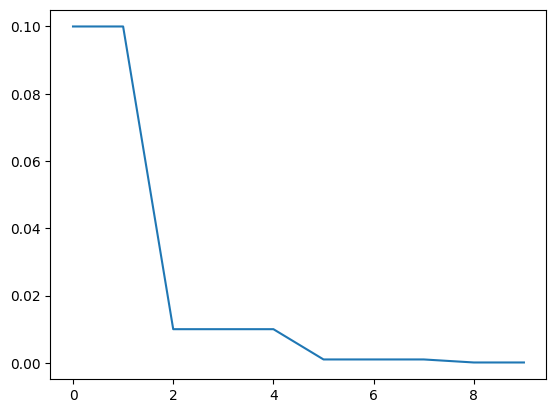

In [10]:
import matplotlib.pyplot as plt

plt.plot(lr_rate_list)
plt.show()

# ReduceLROnPlateau

In [26]:
model = Network()

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                       mode='min',
                                                       factor=0.1,
                                                       patience=5
                                                       )

In [29]:
from tqdm import tqdm
epochs = 10
lr_rate_list = []
for epoch in range(epochs):

    train_loss = 0.0
    model.train()
    for data, labels in tqdm(trainloader):
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
    
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(trainloader)}')

    valid_loss = 0.0
    total_correct = 0
    total_samples = 0
    running_valid_loss = []
    model.eval()
    for data, labels in tqdm(validloader):
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        target = model(data)

        loss = criterion(target, labels)
        valid_loss += loss.item()
        running_valid_loss.append(loss.item())
        mean_val_loss = sum(running_valid_loss) / len(running_valid_loss)

        _, predicted = torch.max(target, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    lr_scheduler.step(metrics=mean_val_loss)
    lr = lr_scheduler.get_last_lr()
    lr_rate_list.append(lr)
    
    accuracy = 100 * total_correct / total_samples

    print(f'Epoch {epoch+1} \t\t Valid Loss: {valid_loss / len(validloader)}')
    print(f'Epoch {epoch+1} \t\t Valid accuracy: {accuracy:.2f}%')
    print(f'Epoch {epoch+1} \t\t learning rate: {lr}')


100%|██████████| 391/391 [00:27<00:00, 14.34it/s]


Epoch 1 		 Training Loss: 0.20298695492813046


100%|██████████| 79/79 [00:03<00:00, 20.06it/s]


Epoch 1 		 Valid Loss: 0.0935832807028672
Epoch 1 		 Valid accuracy: 97.57%
Epoch 1 		 learning rate: [0.1]


100%|██████████| 391/391 [00:30<00:00, 12.83it/s]


Epoch 1 		 Training Loss: 0.19818777167964774


100%|██████████| 79/79 [00:04<00:00, 18.40it/s]


Epoch 2 		 Valid Loss: 0.10487721351754875
Epoch 2 		 Valid accuracy: 97.46%
Epoch 2 		 learning rate: [0.1]


100%|██████████| 391/391 [00:31<00:00, 12.36it/s]


Epoch 1 		 Training Loss: 0.19009093970746335


100%|██████████| 79/79 [00:04<00:00, 17.03it/s]


Epoch 3 		 Valid Loss: 0.11035781500152242
Epoch 3 		 Valid accuracy: 97.36%
Epoch 3 		 learning rate: [0.1]


100%|██████████| 391/391 [00:30<00:00, 12.65it/s]


Epoch 1 		 Training Loss: 0.21402175478218005


100%|██████████| 79/79 [00:04<00:00, 18.23it/s]


Epoch 4 		 Valid Loss: 0.11033519342559378
Epoch 4 		 Valid accuracy: 97.47%
Epoch 4 		 learning rate: [0.1]


100%|██████████| 391/391 [00:30<00:00, 12.74it/s]


Epoch 1 		 Training Loss: 0.18324910745482006


100%|██████████| 79/79 [00:04<00:00, 18.01it/s]


Epoch 5 		 Valid Loss: 0.09912148622804781
Epoch 5 		 Valid accuracy: 97.75%
Epoch 5 		 learning rate: [0.1]


100%|██████████| 391/391 [00:33<00:00, 11.75it/s]


Epoch 1 		 Training Loss: 0.17699895908250984


100%|██████████| 79/79 [00:04<00:00, 17.58it/s]


Epoch 6 		 Valid Loss: 0.08978182879273626
Epoch 6 		 Valid accuracy: 97.93%
Epoch 6 		 learning rate: [0.1]


100%|██████████| 391/391 [00:32<00:00, 11.94it/s]


Epoch 1 		 Training Loss: 0.18997671811477


100%|██████████| 79/79 [00:04<00:00, 16.61it/s]


Epoch 7 		 Valid Loss: 0.10704107793465978
Epoch 7 		 Valid accuracy: 97.80%
Epoch 7 		 learning rate: [0.1]


100%|██████████| 391/391 [00:32<00:00, 12.07it/s]


Epoch 1 		 Training Loss: 0.17635030559528514


100%|██████████| 79/79 [00:04<00:00, 17.43it/s]


Epoch 8 		 Valid Loss: 0.10023230563790174
Epoch 8 		 Valid accuracy: 97.93%
Epoch 8 		 learning rate: [0.1]


100%|██████████| 391/391 [00:32<00:00, 11.97it/s]


Epoch 1 		 Training Loss: 0.1926769254743443


100%|██████████| 79/79 [00:04<00:00, 18.05it/s]


Epoch 9 		 Valid Loss: 0.0972894732442484
Epoch 9 		 Valid accuracy: 97.88%
Epoch 9 		 learning rate: [0.1]


100%|██████████| 391/391 [00:32<00:00, 12.03it/s]


Epoch 1 		 Training Loss: 0.18409899352570933


100%|██████████| 79/79 [00:04<00:00, 16.73it/s]

Epoch 10 		 Valid Loss: 0.09628515895691854
Epoch 10 		 Valid accuracy: 97.73%
Epoch 10 		 learning rate: [0.1]
